In [1]:
# Climada damage assessment

# Assets: LitPop 1 1, Litpop 3 1, Litpop 2 1, Litpop 0 1 
# 1 Tropical cyclones in Philippines
# 1.1 Single Events: Strongest cyclones 2010 - 2020
# 1.2 Probabilistic Events (3 strongest typhoons)
# 1.3 Probabilistic Events 1990-2020 basin = NA, 5 synth. tracks
# 1.4 Probabilistic Events with Climate change impact
# 2 Surge with SLOSH


# 2.1 Probabilistic Events with Climate change impact
# 3 Surge with GeoClaw (validation)
# 4 River Flood
# 5 

import pandas as pd
import numpy as np
from climada import *
from climada.entity import *
from climada.hazard import *
from climada.entity import Exposures
from climada.hazard import Hazard
from climada.entity import Exposures, ImpactFuncSet
from climada.engine import Impact

2021-02-25 21:14:01,709 - climada - DEBUG - Loading default config file: /home/ubuntu/Desktop/climada_python-feature-tc_surge_geoclaw/climada_python-feature-tc_surge_geoclaw/climada/conf/defaults.conf


/home/ubuntu/anaconda3/envs/climada_env/lib/python3.7/site-packages/pandas_datareader/compat/__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


In [2]:
# https://climada-python.readthedocs.io/en/stable/tutorial/1_main_climada.html#Adaptation-options-appraisal

##set working directory and subfolders

wd               =      "/home/ubuntu/Desktop/climada_python-feature-tc_surge_geoclaw/climada_python-feature-tc_surge_geoclaw/"

exposure_litpop  =    wd + "LitPop/"         # done
surges_bathtub   =    wd + "SloshSurge/"     # input waiting from wenlan
surges_river     =    wd + "riversurge/"     # input waiting from wenlan -> could be moved to TIM

tropicalcyclone  =    wd + "TropicalCyclone/"# done

In [3]:
LP = "_LP11"       # Filename extension for the LitPop File to be used (11 would be Lit = 1 and Pop = 1)
year = "_y2020" # Filename extension for the reference year for climate change applied
track = "_tr3012" # track amount (in this case it will be 3012)
res = "_res_001" # resolution of the cells (centroid resolution)

In [4]:
# Hazard Wind

##Load harzard h5 files (tropical cyclones, storm surges. etc)

haz2020wind = Hazard("TC")
haz2050wind = Hazard("TC")
haz2100wind = Hazard("TC")

haz2050wind.read_hdf5('/home/ubuntu/Downloads/drive-download-20210215T164047Z-001/TC_HTI_001_3012tr_2050_45.h5')

haz2020wind.read_hdf5('/home/ubuntu/Downloads/drive-download-20210215T164047Z-001/TC_HTI_001_3012tr_1990_2020.h5')

haz2100wind.read_hdf5('/home/ubuntu/Downloads/drive-download-20210215T164047Z-001/TC_HTI_001_3012tr_2100_45.h5')


# # Hazard Surge Slosh

# haz2040surge = Hazard("TS")
# haz2080surge = Hazard("TS")

# haz2040surge.read_hdf5('/home/ubuntu/Downloads/drive-download-20210215T164047Z-001/TC_HTI_001_3012tr_2050_45.h5')

# haz2080surge.read_hdf5('/home/ubuntu/Downloads/drive-download-20210215T164047Z-001/TC_HTI_001_3012tr_2100_45.h5')

# # Hazard Surge River

# haz2040surge = Hazard("TS")
# haz2080surge = Hazard("TS")

# haz2040surge.read_hdf5('/home/ubuntu/Downloads/drive-download-20210215T164047Z-001/TC_HTI_001_3012tr_2050_45.h5')

# haz2080surge.read_hdf5('/home/ubuntu/Downloads/drive-download-20210215T164047Z-001/TC_HTI_001_3012tr_2100_45.h5')

2021-02-25 21:28:57,009 - climada.hazard.base - INFO - Reading /home/ubuntu/Downloads/drive-download-20210215T164047Z-001/TC_HTI_001_3012tr_2050_45.h5
2021-02-25 21:29:00,088 - climada.hazard.base - INFO - Reading /home/ubuntu/Downloads/drive-download-20210215T164047Z-001/TC_HTI_001_3012tr_1990_2020.h5
2021-02-25 21:29:03,143 - climada.hazard.base - INFO - Reading /home/ubuntu/Downloads/drive-download-20210215T164047Z-001/TC_HTI_001_3012tr_2100_45.h5


In [5]:

# Some statistics for the hazards

hazard = haz2020wind

#helping functions

def varse(a, axis=None):
    """ Variance of sparse matrix a
    var = mean(a**2) - mean(a)**2
    """
    a_squared = a.copy()
    a_squared.data **= 2
    return a_squared.mean(axis) - np.square(a.mean(axis))

def stds(a, axis=None):
    """ Standard deviation of sparse matrix a
    std = sqrt(var(a))
    """
    return np.sqrt(vars(a, axis))

#actual results

print("-----mean---------")
print(hazard.intensity[hazard.intensity>0].mean())
# print(haz2080surge.intensity[haz2100surge.intensity>0].mean())
print(hazard.intensity[hazard.intensity>0].mean())
# print(haz2040surge.intensity[haz2100surge.intensity>0].mean())
print(hazard.intensity[hazard.intensity>0].mean())
print("-----max---------")
print(hazard.intensity.max())
# print(haz2080surge.intensity.max())
print(hazard.intensity.max())
# print(haz2040surge.intensity.max())
print(hazard.intensity.max())
print("-----std---------")


#stds(hazard.intensity)

-----mean---------
25.024978192827994
25.024978192827994
25.024978192827994
-----max---------
73.75393696767716
73.75393696767716
73.75393696767716
-----std---------


In [6]:
# Exposures 
# These are the LitPop h5 files to be read! Specify Litpop name and corresponding exponents

exp1_1 = Exposures()
exp3_1 = Exposures()
exp2_1 = Exposures()
exp0_1 = Exposures()

exp1_1.read_hdf5(exposure_litpop + "LP_HTI_2020_1_1.h5")
exp3_1.read_hdf5(exposure_litpop + "LP_HTI_2020_3_1.h5")
exp2_1.read_hdf5(exposure_litpop + "LP_HTI_2020_2_1.h5")
exp0_1.read_hdf5(exposure_litpop + "LP_HTI_2020_0_1.h5")


# add column to exp1 to match the impact function - if_TC for Tropical cyclone wind and if_TS for storm surge
# for using another hazard type, please delete the previous "if_TC or if_TS" column and add the new one.

exp1_1["if_TS"] = np.ones(len(exp1_1))
exp3_1["if_TS"] = np.ones(len(exp3_1))
exp2_1["if_TS"] = np.ones(len(exp2_1))
exp0_1["if_TS"] = np.ones(len(exp0_1))
                            
exp = exp1_1

2021-02-25 21:29:36,311 - climada.entity.exposures.base - INFO - Reading /home/ubuntu/Desktop/climada_python-feature-tc_surge_geoclaw/climada_python-feature-tc_surge_geoclaw/LitPop/LP_HTI_2020_1_1.h5
2021-02-25 21:29:37,152 - climada.entity.exposures.base - INFO - Reading /home/ubuntu/Desktop/climada_python-feature-tc_surge_geoclaw/climada_python-feature-tc_surge_geoclaw/LitPop/LP_HTI_2020_3_1.h5
2021-02-25 21:29:37,229 - climada.entity.exposures.base - INFO - Reading /home/ubuntu/Desktop/climada_python-feature-tc_surge_geoclaw/climada_python-feature-tc_surge_geoclaw/LitPop/LP_HTI_2020_2_1.h5
2021-02-25 21:29:37,304 - climada.entity.exposures.base - INFO - Reading /home/ubuntu/Desktop/climada_python-feature-tc_surge_geoclaw/climada_python-feature-tc_surge_geoclaw/LitPop/LP_HTI_2020_0_1.h5


2021-02-25 21:53:09,017 - climada.util.coordinates - INFO - Raster from resolution 0.008333333333325754 to 0.008333333333325754.


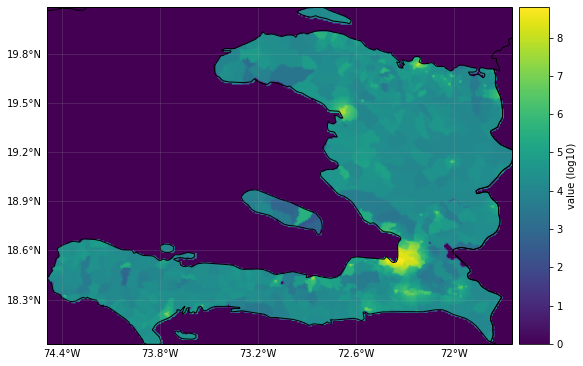

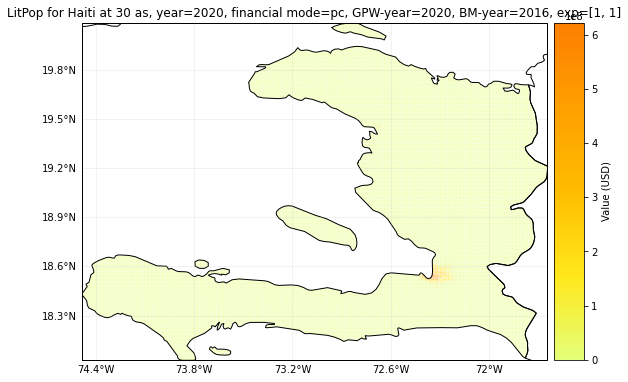

In [26]:
# DATA PLOT

exp_p = exp.plot_raster()
exp_p.figure.savefig('/home/ubuntu/Desktop/climada_python-feature-tc_surge_geoclaw/climada_python-feature-tc_surge_geoclaw/outEAI/' + "_plot_ras" + year + LP + ".tif")
exp2 = exp.plot_hexbin(pop_name = False)
exp2.figure.savefig('/home/ubuntu/Desktop/climada_python-feature-tc_surge_geoclaw/climada_python-feature-tc_surge_geoclaw/outEAI/' + "_hexbin" + year + LP + ".tif")

In [7]:
# impact functions. Enter path for impact function ecxel file


from climada.entity import ImpactFuncSet

imp_set = ImpactFuncSet()
imp_set.read_excel('/home/ubuntu/Downloads/entity_impactfunc (1).xlsx')

In [8]:
# CHECK CONTENTS OF IMPACT FUNCTIONS

print(imp_set.get_hazard_types())
print(imp_set.get_ids())
print(imp_set.get_func(haz_type=None, fun_id=None))

['TC', 'TS']
{'TC': [1], 'TS': [2, 3, 4, 5, 6, 7]}
{'TC': {1: <climada.entity.impact_funcs.base.ImpactFunc object at 0x7fbadb115dd0>}, 'TS': {2: <climada.entity.impact_funcs.base.ImpactFunc object at 0x7fbae9548850>, 3: <climada.entity.impact_funcs.base.ImpactFunc object at 0x7fbadb1c6950>, 4: <climada.entity.impact_funcs.base.ImpactFunc object at 0x7fbadb1e9610>, 5: <climada.entity.impact_funcs.base.ImpactFunc object at 0x7fbadb15d4d0>, 6: <climada.entity.impact_funcs.base.ImpactFunc object at 0x7fbadb15d790>, 7: <climada.entity.impact_funcs.base.ImpactFunc object at 0x7fbadb115890>}}


In [15]:
# CALCULATE IMPACT

imp = Impact()
imp1 = Impact()
imp2 = Impact()
imp.calc(exp, imp_set, haz2100wind, save_mat = True)
imp1.calc(exp, imp_set, haz2020wind, save_mat = True)
imp2.calc(exp, imp_set, haz2050wind, save_mat = True)


2021-02-25 21:42:38,297 - climada.engine.impact - INFO - Exposures matching centroids found in centr_TC
2021-02-25 21:42:38,299 - climada.engine.impact - INFO - Calculating damage for 33052 assets (>0) and 3012 events.
2021-02-25 21:42:38,300 - climada.engine.impact - INFO - Missing exposures impact functions for hazard if_TC. Using impact functions in if_.
2021-02-25 21:42:38,639 - climada.engine.impact - INFO - Exposures matching centroids found in centr_TC
2021-02-25 21:42:38,641 - climada.engine.impact - INFO - Calculating damage for 33052 assets (>0) and 3012 events.
2021-02-25 21:42:38,641 - climada.engine.impact - INFO - Missing exposures impact functions for hazard if_TC. Using impact functions in if_.
2021-02-25 21:42:38,927 - climada.engine.impact - INFO - Exposures matching centroids found in centr_TC
2021-02-25 21:42:38,929 - climada.engine.impact - INFO - Calculating damage for 33052 assets (>0) and 3012 events.
2021-02-25 21:42:38,930 - climada.engine.impact - INFO - Miss

In [16]:
imp, imp1, imp2

(<climada.engine.impact.Impact at 0x7fbadb128c50>,
 <climada.engine.impact.Impact at 0x7fbadb074d10>)

/home/ubuntu/Desktop/climada_python-feature-tc_surge_geoclaw/climada_python-feature-tc_surge_geoclaw/climada/util/plot.py:314: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  fig.tight_layout()
/home/ubuntu/anaconda3/envs/climada_env/lib/python3.7/site-packages/cartopy/mpl/feature_artist.py:225: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  **dict(style))


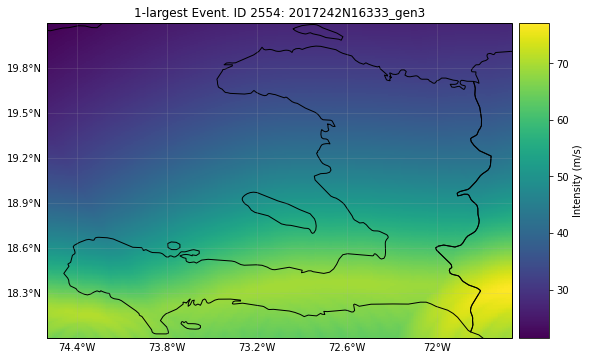

In [25]:
# plot strongest event and print the data
outEAI = '/home/ubuntu/Desktop/climada_python-feature-tc_surge_geoclaw/climada_python-feature-tc_surge_geoclaw/outEAI/'
strong = haz2100wind.plot_intensity(-1)
strong.figure.savefig(outEAI+ "strongest" +LP+ track+ year+".svg")
strong.figure.savefig(outEAI+ "strongest" +LP+ track+ year+".png")

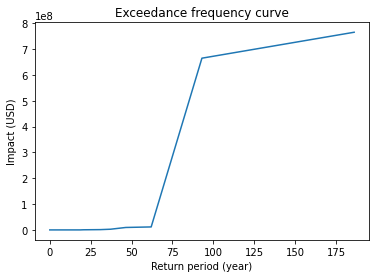

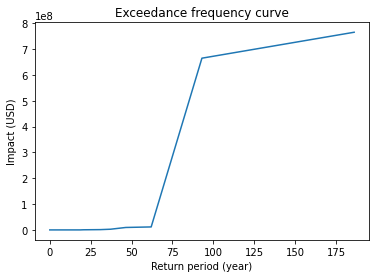

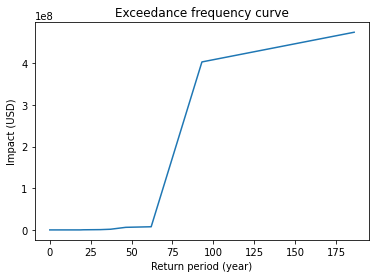

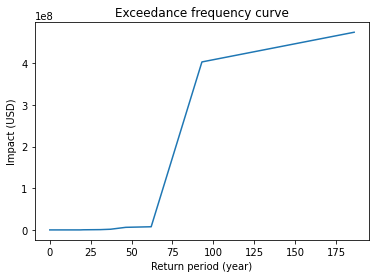

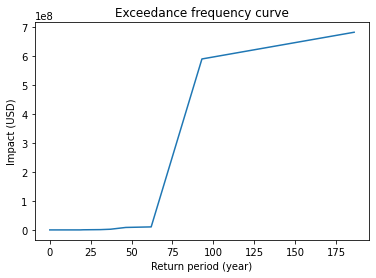

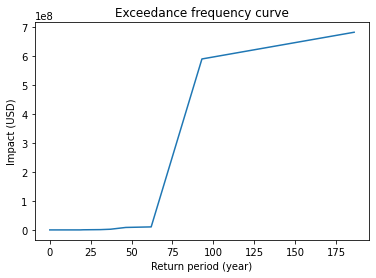

In [30]:
# impact exceedence curve for probabilistic events

imp_exc_curve = imp.calc_freq_curve()
imp_exc_curve1 = imp1.calc_freq_curve()
imp_exc_curve2 = imp2.calc_freq_curve()
imp_exc_curve.plot().figure.savefig(outEAI+"exce_freq_curve_PHL_" + LP + year + track+ "_eai.svg")
imp_exc_curve.plot().figure.savefig(outEAI+"exce_freq_curve_PHL_" + LP + year + track+ "_eai.png")
imp_exc_curve1.plot().figure.savefig(outEAI+"exce_freq_curve_PHL_" + LP + year + "1" + track+ "_eai.svg")
imp_exc_curve1.plot().figure.savefig(outEAI+"exce_freq_curve_PHL_" + LP + year + "1" + track+ "_eai.png")
imp_exc_curve2.plot().figure.savefig(outEAI+"exce_freq_curve_PHL_" + LP + year + "2" + track+ "_eai.svg")
imp_exc_curve2.plot().figure.savefig(outEAI+"exce_freq_curve_PHL_" + LP + year + "2" + track+ "_eai.png")

In [38]:
# create CSV file for further potential analysis

impzip = zip(
    imp_exc_curve.impact,imp_exc_curve.return_per,
    imp_exc_curve1.impact,imp_exc_curve1.return_per,
    imp_exc_curve2.impact,imp_exc_curve1.return_per
)
impzip = pd.DataFrame(imp_exc_curve.impact,imp_exc_curve.return_per)
impzip.to_csv(outEAI+"imp_exc_curve"+LP+year+track+".csv")

In [45]:
# save impact as csv and xlsx

imp.write_csv(outEAI+"impact"+LP+year+track+"_eai.csv")
imp.write_excel(outEAI+"impact"+LP+year+track+"_eai.xlsx")

imp1.write_csv(outEAI+"impact"+"1"+LP+year+track+"_eai.csv")
imp1.write_excel(outEAI+"impact"+"1"+LP+year+track+"_eai.xlsx")

imp2.write_csv(outEAI+"impact"+"2"+LP+year+track+"_eai.csv")
imp2.write_excel(outEAI+"impact"+"2"+LP+year+track+"_eai.xlsx")

2021-02-25 22:20:29,615 - climada.engine.impact - INFO - Writing /home/ubuntu/Desktop/climada_python-feature-tc_surge_geoclaw/climada_python-feature-tc_surge_geoclaw/outEAI/impact_LP11_y2020_tr3012_eai.csv
2021-02-25 22:20:29,748 - climada.engine.impact - INFO - Writing /home/ubuntu/Desktop/climada_python-feature-tc_surge_geoclaw/climada_python-feature-tc_surge_geoclaw/outEAI/impact_LP11_y2020_tr3012_eai.xlsx
2021-02-25 22:20:31,019 - climada.engine.impact - INFO - Writing /home/ubuntu/Desktop/climada_python-feature-tc_surge_geoclaw/climada_python-feature-tc_surge_geoclaw/outEAI/impact1_LP11_y2020_tr3012_eai.csv
2021-02-25 22:20:31,165 - climada.engine.impact - INFO - Writing /home/ubuntu/Desktop/climada_python-feature-tc_surge_geoclaw/climada_python-feature-tc_surge_geoclaw/outEAI/impact1_LP11_y2020_tr3012_eai.xlsx
2021-02-25 22:20:32,550 - climada.engine.impact - INFO - Writing /home/ubuntu/Desktop/climada_python-feature-tc_surge_geoclaw/climada_python-feature-tc_surge_geoclaw/outEAI

In [48]:
# print key values (tot value damaged and annual average impact)
list = [imp,imp1,imp2]
for i in list:
    print(i.tot_value,i.aai_agg)
 
# print(imp.tot_value)
# print(imp.aai_agg)

49474536037.9 7832677.70162756
49474536037.9 4808047.6116437325
49474536037.9 6983733.789991281


In [59]:
list = [imp,imp1,imp2]
for i in list:
    calc = i.calc_impact_year_set()
    print(calc)
# txt = imp.calc_impact_year_set()
# txt

{1990: 0.0, 1991: 0.0, 1992: 0.0, 1993: 0.0, 1994: 138.29747480190815, 1995: 0.0, 1996: 360.0196630223059, 1997: 0.0, 1998: 13165.499885323175, 1999: 0.0, 2000: 0.0, 2001: 1334.9590896950763, 2002: 0.0, 2003: 0.0, 2004: 9485981.39581581, 2005: 61388.31418628265, 2006: 0.0, 2007: 11561969.124963932, 2008: 691884.9894691715, 2009: 0.0, 2010: 664680569.440514, 2011: 0.0, 2012: 921846.7603320716, 2013: 0.0, 2014: 0.0, 2015: 0.0, 2016: 4349159.546190208, 2017: 765110230.1921201, 2018: 0.0, 2019: 0.0, 2020: 23.963021452035925}
{1990: 0.0, 1991: 0.0, 1992: 0.0, 1993: 0.0, 1994: 24.42868170258506, 1995: 0.0, 1996: 23.368178494146658, 1997: 0.0, 1998: 2713.887523752608, 1999: 0.0, 2000: 0.0, 2001: 511.10717204931404, 2002: 0.0, 2003: 0.0, 2004: 6203363.575498524, 2005: 34114.53468245573, 2006: 0.0, 2007: 7584675.087231562, 2008: 391118.484747223, 2009: 0.0, 2010: 402903383.17527634, 2011: 0.0, 2012: 408209.3159886327, 2013: 0.0, 2014: 0.0, 2015: 0.0, 2016: 2632957.939946775, 2017: 474135760.843

2021-02-25 22:42:49,805 - climada.util.coordinates - INFO - Raster from resolution 0.008333333333325754 to 0.008333333333325754.
2021-02-25 22:42:55,776 - climada.util.coordinates - INFO - Raster from resolution 0.008333333333325754 to 0.008333333333325754.
2021-02-25 22:43:01,766 - climada.util.coordinates - INFO - Raster from resolution 0.008333333333325754 to 0.008333333333325754.


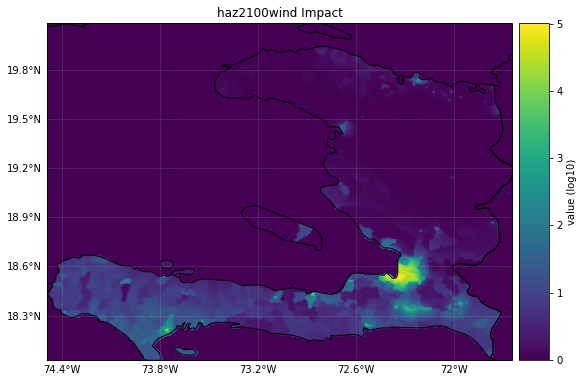

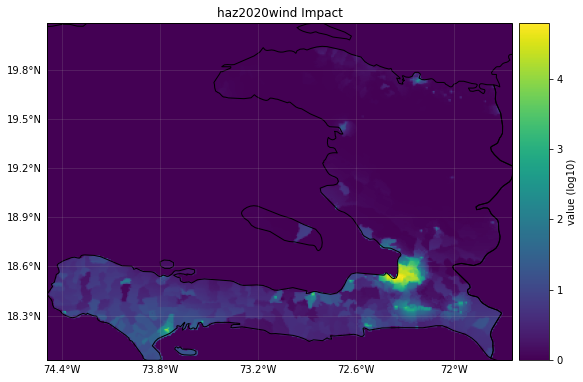

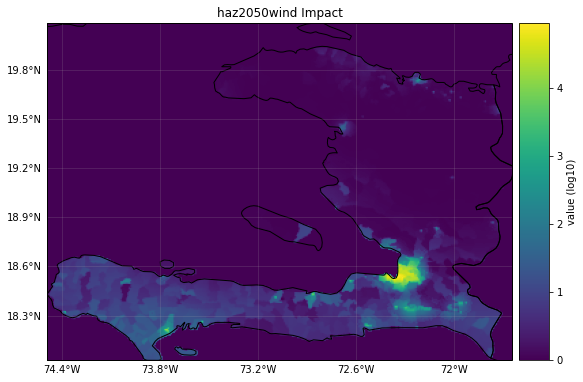

In [61]:
#plotting and also use set extent (can be left out !!)
#minlon5 =
#maxlon5 =
#minlat5 =
#maxlat5 =
p1 = imp.plot_raster_eai_exposure(save_tiff= outEAI + "eaiexposure"+LP+year+track+".tif") 
p2 = imp1.plot_raster_eai_exposure(save_tiff= outEAI + "1"+ "eaiexposure"+LP+year+track+".tif")
p3 = imp2.plot_raster_eai_exposure(save_tiff= outEAI + "2"+"eaiexposure"+LP+year+track+".tif") 
p1.set_title("haz2100wind Impact")
p2.set_title("haz2020wind Impact")
p3.set_title("haz2050wind Impact")
#p1.set_extent([minlon5, maxlon5,minlat5, maxlat5])

p1.figure.savefig(outEAI + "eaiexposure"+LP+year+track+".svg")
#p1.set_extent([minlon5, maxlon5,minlat5, maxlat5])
p1.figure.savefig(outEAI + "eaiexposure"+LP+year+track+".png")
#p1.set_extent([minlon5, maxlon5,minlat5, maxlat5])
p2.figure.savefig(outEAI + "1"+"eaiexposure"+LP+year+track+".svg")
p2.figure.savefig(outEAI + "1"+"eaiexposure"+LP+year+track+".png")

p3.figure.savefig(outEAI + "2"+"eaiexposure"+LP+year+track+".svg")
p3.figure.savefig(outEAI + "2"+"eaiexposure"+LP+year+track+".png")

In [ ]:
p2 = imp.plot_basemap_impact_exposure() 
#p2.set_extent([minlon5, maxlon5,minlat5, maxlat5])
p2.set_title("haz2100wind Impact")
# p2.figure.savefig(outEAI + "plot_basemap_impact_exposure"+LP+year+track+".svg")
# p2.figure.savefig(outEAI + "plot_basemap_impact_exposure"+LP+year+track+".png")

In [ ]:
p3 = imp.plot_scatter_eai_exposure()
#p3.set_extent([minlon5, maxlon5,minlat5, maxlat5])
p3.set_title("haz2100wind Impact")
p3.figure.savefig(outEAI + "scatter_eai_exposure"+LP+year+track+".png")
p3.figure.savefig(outEAI + "scatter_eai_exposure"+LP+year+track+".svg")

In [ ]:
# p4 = imp.plot_hexbin_eai_exposure(ignore_zero=True)
# p4.figure.savefig(outEAI + "hexbin_eai_exposure_nozero"+LP+year+track+".png")
# p4.figure.savefig(outEAI + "hexbin_eai_exposure_nozero"+LP+year+track+".svg")

In [ ]:
#imp.local_exceedance_imp()

In [ ]:
# p6 = imp.plot_hexbin_impact_exposure()
# p6.figure.savefig(outEAI + "hexbin_impact_exposure"+LP+year+track+".png")
# p6.figure.savefig(outEAI + "hexbin_impact_exposure"+LP+year+track+".svg")

In [ ]:
# imp.plot_rp_imp([10, 50, 75, 100])

In [ ]:
#from climada.engine import CostBenefit

# cost_ben = CostBenefit()
# cost_ben.calc(tc_fl, ent_fl, future_year=2060) # prints costs and benefits
# cost_ben.plot_cost_benefit() # plot cost benefit ratio and averted damage of every exposure
# cost_ben.plot_event_view() # plot averted damage of each measure for every return period